# Processing chain - Standard Precipitation computation

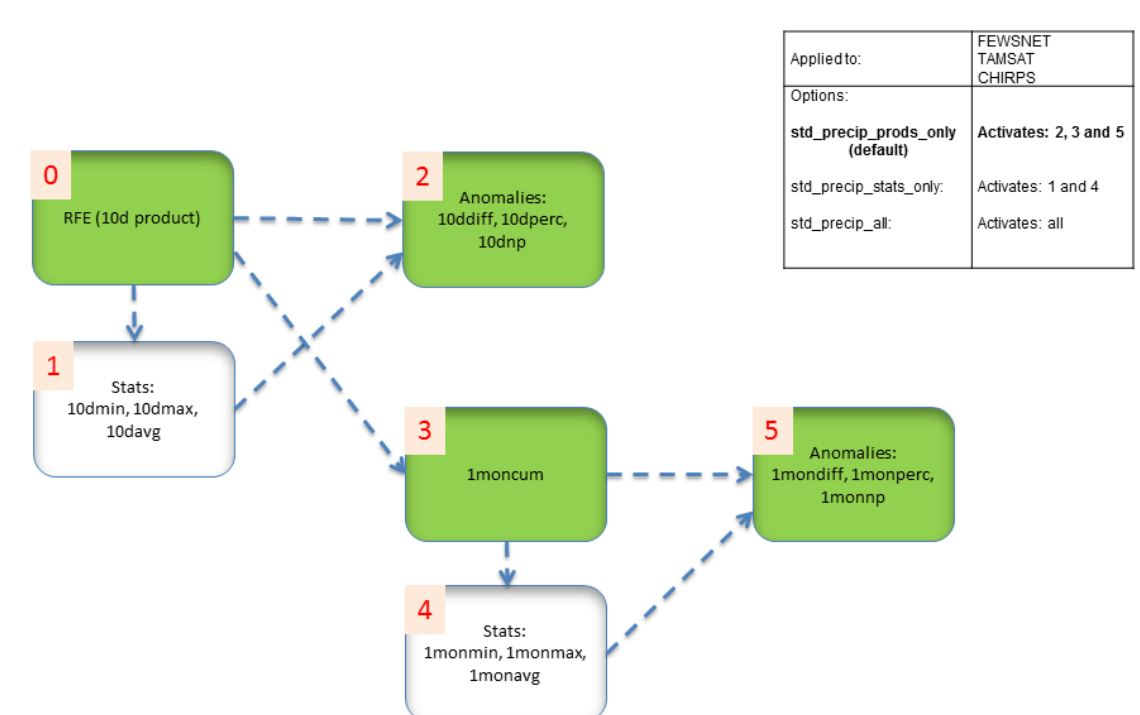

#### Import Climate station libraries

In [ ]:
from apps.productmanagement.datasets import Dataset 
from apps.processing.proc import Processing

#### Initialize the tamsat dataset

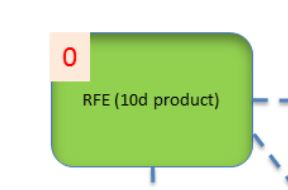

In [ ]:
tamsat_10day_input = Dataset(product_code="tamsat-rfe", sub_product_code="10d", mapset="TAMSAT-Africa-4km", version="3.1")

#### Temporal filtering for year 2022.. So the computations are made only for 2022

In [ ]:
tamsat_10day_input.filter("20220101","20221231")

#### Initialize the Processing Class by passing the tamsat dataset

In [ ]:
processing_chain_tamsat = Processing(tamsat_10day_input)

#### Initialize the 10day Long Term stats (LTS) data needed for the anamoly computation

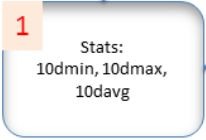

In [ ]:
tamsat_10day_average = Dataset(product_code="tamsat-rfe", sub_product_code="10davg", mapset="TAMSAT-Africa-4km", version="3.1")
tamsat_10day_min = Dataset(product_code="tamsat-rfe", sub_product_code="10dmin", mapset="TAMSAT-Africa-4km", version="3.1")
tamsat_10day_max = Dataset(product_code="tamsat-rfe", sub_product_code="10dmax", mapset="TAMSAT-Africa-4km", version="3.1")

### Computation of 10day anamoly

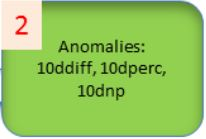

In [ ]:
perc_diff_tamsat_10day_dataset = processing_chain_tamsat.compute_percent_difference(output_sprod='10dperc', avg_dataset=tamsat_10day_average)
abs_diff_tamsat_10day_dataset = processing_chain_tamsat.compute_absolute_difference(output_sprod='10ddiff', avg_dataset=tamsat_10day_average)
np_tamsat_10day_dataset = processing_chain_tamsat.compute_normalized_anomaly(output_sprod='10dnp', min_dataset=tamsat_10day_min, max_dataset=tamsat_10day_max)

### Computation the 1month Cumulation

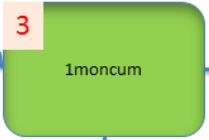

In [ ]:
monthly_cumulative_dataset = processing_chain_tamsat.compute_cumulative(output_frequency='month',
                                                             output_sprod='1monthcum')

#### Close the initialized processing class after finishing

In [ ]:
processing_chain_tamsat.close()